In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv.zip')

In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

## Part 1: Understanding Product Categories

Business Question: 

> What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

> Generate a frequency table for the product category.

> Which are the top 5 most listed product categories?

Visualizations:

> Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

> For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [5]:
df['category'].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [6]:
df['category'].value_counts(normalize=True)

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [7]:
#The sports and outdoors category surpases other categories close to 5X their proportion 
#Compare 34% vs. 7% for following top categories

In [8]:
cat_table = pd.crosstab(index = df["category"],  # Make a crosstab
                              columns="count")      # Name the count column

top_cat_table = cat_table.sort_values(by='count', ascending=False).head(5)

In [9]:
top_cat_table 

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


In [10]:
top_cat_table .columns

Index(['count'], dtype='object', name='col_0')

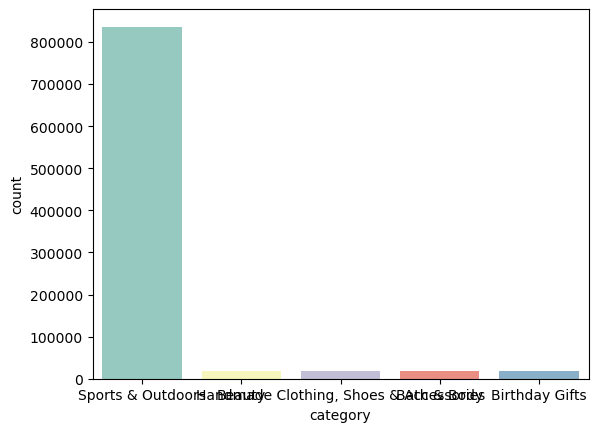

In [11]:
sns.barplot(x=top_cat_table.index, y=top_cat_table['count'], palette="Set3");

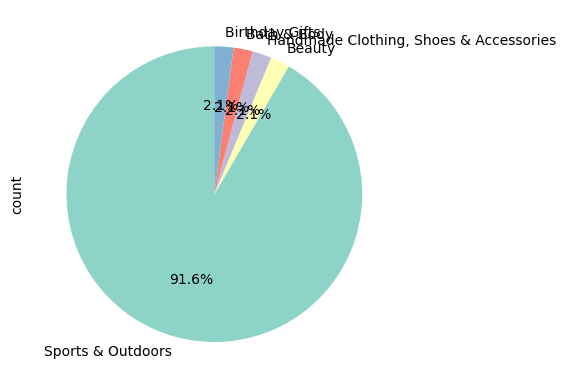

In [12]:
top_cat_table['count'].plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));

In [13]:
#The sports & outdoors category is without a doubt the most popular category

## Part 2: Delving into Product Pricing

Business Question: 

> How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

> Calculate the mean, median, and mode for the price of products.

> What's the average price point of products listed? How does this compare with the most common price point (mode)?

Measures of Dispersion:

> Determine the variance, standard deviation, range, and interquartile range for product price.

> How varied are the product prices? Are there any indicators of a significant spread in prices?

Visualizations:

> Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

> Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [14]:
df['price'].value_counts()

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

In [15]:
round(df['price'].describe(),2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


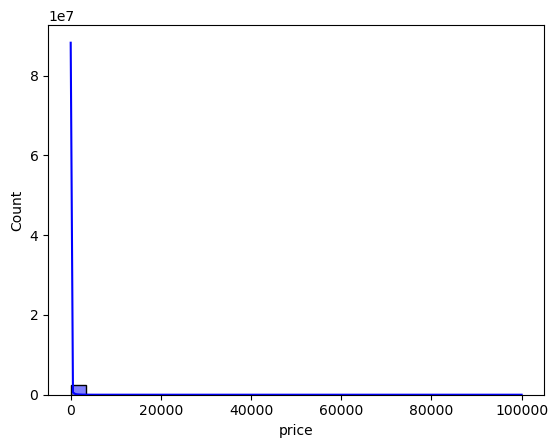

In [16]:
sns.histplot(df['price'], kde=True, bins=30, color="blue");

<Axes: >

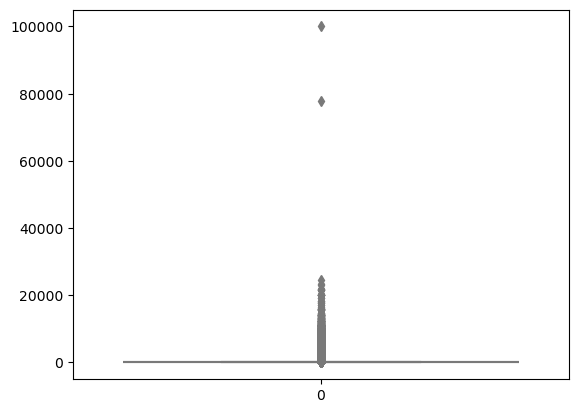

In [17]:
sns.boxplot(data = df['price'], color="lightblue")

In [18]:
print(df['price'].var())
print(df['price'].std())
print(df['price'].max() - df['price'].min())
print(df['price'].quantile([0.25, 0.5, 0.75]))

119445.48532256528
345.60886175352226
100000.0
0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


Conclusions:
    
    The mayority of prices are very low cuantities, guessing that they mostly range 
    from $9.99 to less than $99.99 9top prices range from $9.99 to less than $20
    
    Mean = $89.24
    Mode = $9.99
    Very different output meaning that there are outliers (products with very high prices)
    that affect the average price
    
    The high value for variance and standard deviation as well as the range confirms that 
    the prices are very spread out, further proving the existence of outliers
    
    It is very clear that most products have lower prices. We could create a histogram of products
    that have a price less than $100 for a better representation
    
    We can see that there are many products that fall outside of the box (up to 20,000) plot and in two? 
    occasions there are outliers that have extremely high prices (80,000 and 100,000)



## Part 3: Unpacking Product Ratings

Business Question: 

> How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

> Calculate the mean, median, and mode for the rating of products.

> How do customers generally rate products? Is there a common trend?

Measures of Dispersion:

> Determine the variance, standard deviation, and interquartile range for product rating.

> Are the ratings consistent, or is there a wide variation in customer feedback?

Shape of the Distribution:

> Calculate the skewness and kurtosis for the rating column.

> Are the ratings normally distributed, or do they lean towards higher or lower values?

Visualizations:

> Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [22]:
round(df['stars'].describe(),2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

In [25]:
df['stars'].value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [29]:
print(df['stars'].mean())
print(df['stars'].median())
print(df['stars'].mode())

2.152836472966065
0.0
0    0.0
Name: stars, dtype: float64


In [30]:
print(df['stars'].var())
print(df['stars'].std())
print(df['stars'].max() - df['price'].min())
print(df['stars'].quantile([0.25, 0.5, 0.75]))

4.81743402976196
2.1948653785054697
5.0
0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


In [32]:
print(df['stars'].skew())
print(df['stars'].kurtosis())

0.08120735761080985
-1.9260061280432985


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


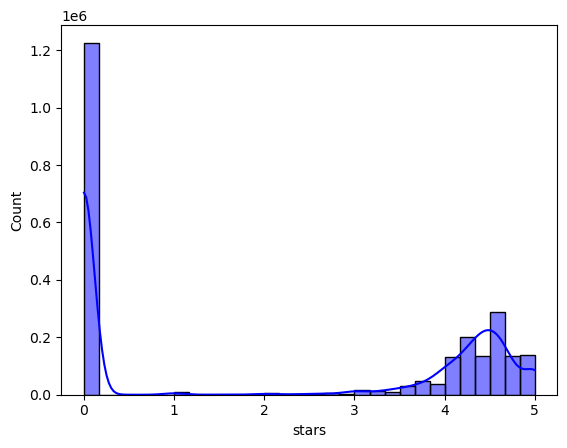

In [33]:
sns.histplot(df['stars'], kde=True, bins=30, color="blue");

Conclusion:

The majority of ratings have a value of 0.0 which indicates most customers do not leave reviews 

For those that do leave reviews, the majority of ratings are between 4.0 and 5.0 (mostly 4.4-4.6)

There really isn't a wide variation in ratings given that mostly are 0.0

The ratings are not evenly distributed. Most are 0.0 (no ratings) and the rest are between 4.4 and 4.6

The histogram confirms that most people do not rate, therefore the most common rating is 0.0